CASE – Engenheiro de Analytics
 
Desenvolva uma solução de BI com dados abertos disponíveis no Portal da Transparência do Governo Federal.
Utilize como base, os dados disponíveis das seguintes sessões do portal da transparência: 

Despesas Pública
•	Execução da despesa
 
Receitas Públicas
•	Execução da receita



- As receitas públicas são o montante total em recursos recolhidos pelo Tesouro Nacional e que serão incorporados ao patrimônio do Estado. Essas receitas servem para custear as despesas públicas e as necessidades de investimentos públicos. 
-  As despesas públicas, fixadas na LOA, representam os gastos autorizados para o governo nas diversas atividades e programas que compõe o orçamento público. Nesse conjunto estão as despesas com pessoal, educação, saúde, transporte, segurança, etc.

**Análise descritiva dos dados importados**

Os dados escolhido são o de Execução da Receita, do Portal da transparência, referente ao ano de 2022.

**Obtendo dados para realizar a análise:**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Receitas**

In [ ]:
receita = pd.read_csv ('/content/2022_Receitas.csv', sep=';')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#importando biblioteca para fazer gráficos do tipo waffle
!pip install pywaffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.1 MB 1.2 MB/s 


**Estrutura dos dados:** 

In [ ]:
receita.head()

,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,NOME ÓRGÃO,CÓDIGO UNIDADE GESTORA,NOME UNIDADE GESTORA,CATEGORIA ECONÔMICA,ORIGEM RECEITA,ESPÉCIE RECEITA,DETALHAMENTO,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,PERCENTUAL REALIZADO,DATA LANÇAMENTO,ANO EXERCÍCIO
0,25201,Banco Central do Brasil - Orçamento Fiscal e,25201,Banco Central do Brasil - Orçamento Fiscal e S...,173057,BANCO CENTRAL DO BRASIL,Receitas Correntes,Receita de Serviços,Serviços Administrativos e Comerciais Gerais,SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC.,0,0,596146,0,08/08/2022,2022
1,25201,Banco Central do Brasil - Orçamento Fiscal e,25201,Banco Central do Brasil - Orçamento Fiscal e S...,173057,BANCO CENTRAL DO BRASIL,Receitas Correntes,Receita de Serviços,Serviços Administrativos e Comerciais Gerais,SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC.,0,0,572111,0,26/01/2022,2022
2,25201,Banco Central do Brasil - Orçamento Fiscal e,25201,Banco Central do Brasil - Orçamento Fiscal e S...,173057,BANCO CENTRAL DO BRASIL,Receitas Correntes,Receita de Serviços,Serviços Administrativos e Comerciais Gerais,SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC.,0,0,575,0,01/09/2022,2022
3,25201,Banco Central do Brasil - Orçamento Fiscal e,25201,Banco Central do Brasil - Orçamento Fiscal e S...,173057,BANCO CENTRAL DO BRASIL,Receitas Correntes,Receita de Serviços,Serviços Administrativos e Comerciais Gerais,SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC.,0,0,64,0,21/09/2022,2022
4,25201,Banco Central do Brasil - Orçamento Fiscal e,25201,Banco Central do Brasil - Orçamento Fiscal e S...,173057,BANCO CENTRAL DO BRASIL,Receitas Correntes,Receita de Serviços,Serviços Administrativos e Comerciais Gerais,SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC.,0,0,537960,0,26/10/2022,2022


coluna valor realizado: maior gasto é em R$584.956.046,8 para Banco Central do Brasil - Orçamento Fiscal e Seguridade Social - Unidades com vínculo direto.


In [ ]:
receita.describe()

,CÓDIGO ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,CÓDIGO UNIDADE GESTORA,PERCENTUAL REALIZADO,ANO EXERCÍCIO
count,140017.000000,140017.000000,140017.000000,140017.000000,140017.0
mean,32199.238114,31220.407515,230455.019969,0.269696,2022.0
std,10237.184099,10038.572322,139504.438305,99.380147,0.0
min,20000.000000,20101.000000,110005.000000,0.000000,2022.0
25%,25000.000000,25000.000000,154042.000000,0.000000,2022.0
50%,26000.000000,26294.000000,170013.000000,0.000000,2022.0
75%,39000.000000,34902.000000,242160.000000,0.000000,2022.0
max,81000.000000,90000.000000,873001.000000,37186.000000,2022.0


In [ ]:
receita.shape
print('O dataset possui',receita.shape[0], 'linhas e', receita.shape[1], 'colunas.')

O dataset possui 1048575 linhas e 6 colunas.


In [ ]:
#colunas do dataset:
receita.columns

Index(['CÓDIGO ÓRGÃO SUPERIOR', 'NOME ÓRGÃO SUPERIOR', 'CÓDIGO ÓRGÃO',
       'NOME ÓRGÃO', 'CÓDIGO UNIDADE GESTORA', 'NOME UNIDADE GESTORA',
       'CATEGORIA ECONÔMICA', 'ORIGEM RECEITA', 'ESPÉCIE RECEITA',
       'DETALHAMENTO', 'VALOR PREVISTO ATUALIZADO', 'VALOR LANÇADO',
       'VALOR REALIZADO', 'PERCENTUAL REALIZADO', 'DATA LANÇAMENTO',
       'ANO EXERCÍCIO'],
      dtype='object')

In [ ]:
#especificações sobre os dados:
receita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140017 entries, 0 to 140016
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   CÓDIGO ÓRGÃO SUPERIOR      140017 non-null  int64 
 1   NOME ÓRGÃO SUPERIOR        140017 non-null  object
 2   CÓDIGO ÓRGÃO               140017 non-null  int64 
 3   NOME ÓRGÃO                 140017 non-null  object
 4   CÓDIGO UNIDADE GESTORA     140017 non-null  int64 
 5   NOME UNIDADE GESTORA       140017 non-null  object
 6   CATEGORIA ECONÔMICA        140017 non-null  object
 7   ORIGEM RECEITA             140017 non-null  object
 8   ESPÉCIE RECEITA            140017 non-null  object
 9   DETALHAMENTO               140017 non-null  object
 10  VALOR PREVISTO ATUALIZADO  140017 non-null  object
 11  VALOR LANÇADO              140017 non-null  object
 12  VALOR REALIZADO            140017 non-null  object
 13  PERCENTUAL REALIZADO       140017 non-null  

In [ ]:
#selecionando apenas as colunas do tipo object:
receita.select_dtypes(include='object')

,NOME ÓRGÃO SUPERIOR,NOME ÓRGÃO,NOME UNIDADE GESTORA,CATEGORIA ECONÔMICA,ORIGEM RECEITA,ESPÉCIE RECEITA,DETALHAMENTO,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,DATA LANÇAMENTO
0,Banco Central do Brasil - Orçamento Fiscal e,Banco Central do Brasil - Orçamento Fiscal e S...,BANCO CENTRAL DO BRASIL,Receitas Correntes,Receita de Serviços,Serviços Administrativos e Comerciais Gerais,SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC.,0,0,596146,08/08/2022
1,Banco Central do Brasil - Orçamento Fiscal e,Banco Central do Brasil - Orçamento Fiscal e S...,BANCO CENTRAL DO BRASIL,Receitas Correntes,Receita de Serviços,Serviços Administrativos e Comerciais Gerais,SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC.,0,0,572111,26/01/2022
2,Banco Central do Brasil - Orçamento Fiscal e,Banco Central do Brasil - Orçamento Fiscal e S...,BANCO CENTRAL DO BRASIL,Receitas Correntes,Receita de Serviços,Serviços Administrativos e Comerciais Gerais,SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC.,0,0,575,01/09/2022
3,Banco Central do Brasil - Orçamento Fiscal e,Banco Central do Brasil - Orçamento Fiscal e S...,BANCO CENTRAL DO BRASIL,Receitas Correntes,Receita de Serviços,Serviços Administrativos e Comerciais Gerais,SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC.,0,0,64,21/09/2022
4,Banco Central do Brasil - Orçamento Fiscal e,Banco Central do Brasil - Orçamento Fiscal e S...,BANCO CENTRAL DO BRASIL,Receitas Correntes,Receita de Serviços,Serviços Administrativos e Comerciais Gerais,SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC.,0,0,537960,26/10/2022
...,...,...,...,...,...,...,...,...,...,...,...
140012,Presidência da República,Instituto Nacional de Tecnologia da Informação,INSTITUTO NAC.DE TECNOLOGIA DA INFORMACAO ITI,Receitas Correntes,Receita de Serviços,Serviços Administrativos e Comerciais Gerais,"SERV.DE REGIST.,CERTIF.E FISCALIZ.-PRINCIPAL",0,0,200000,19/04/2022
140013,Presidência da República,Fundo de Imprensa Nacional,FUNDO DE IMPRENSA NACIONAL/EXEC.ORC.FINANC.,Receitas Correntes,Receita Industrial,Receita da indústria extrativa mineral,RECEITA INDUSTRIAL-MULTAS E JUROS,0,0,"456,26",19/08/2022
140014,Presidência da República,Presidência da República,SECRETARIA DE ADMINISTRACAO-SET.ORC.E FIN./PR,Receitas de Capital,Alienação de Bens,Alienação de bens móveis,ALIENACAO DE BENS MOVEIS E SEMOVENTES-PRINC.,0,0,250532,23/03/2022
140015,Presidência da República,Presidência da República,SECRETARIA DE ADMINISTRACAO-SET.ORC.E FIN./PR,Receitas de Capital,Alienação de Bens,Alienação de bens móveis,ALIENACAO DE BENS MOVEIS E SEMOVENTES-PRINC.,0,0,"67599,41",29/09/2022


In [ ]:
#valores ausentes
receita.isnull().sum()

CÓDIGO ÓRGÃO SUPERIOR          0
NOME ÓRGÃO SUPERIOR            0
CÓDIGO ÓRGÃO                   0
NOME ÓRGÃO                     0
CÓDIGO UNIDADE GESTORA         0
NOME UNIDADE GESTORA           0
CATEGORIA ECONÔMICA            0
ORIGEM RECEITA                 0
ESPÉCIE RECEITA                0
DETALHAMENTO                   0
VALOR PREVISTO ATUALIZADO      0
VALOR LANÇADO                  0
VALOR REALIZADO                0
PERCENTUAL REALIZADO           0
DATA LANÇAMENTO              123
ANO EXERCÍCIO                  0
dtype: int64

In [ ]:
#quantidade de registros únicos em cada coluna
receita.nunique()

CÓDIGO ÓRGÃO SUPERIOR            21
NOME ÓRGÃO SUPERIOR              21
CÓDIGO ÓRGÃO                    250
NOME ÓRGÃO                      249
CÓDIGO UNIDADE GESTORA          263
NOME UNIDADE GESTORA            261
CATEGORIA ECONÔMICA               5
ORIGEM RECEITA                   15
ESPÉCIE RECEITA                  45
DETALHAMENTO                    649
VALOR PREVISTO ATUALIZADO      1707
VALOR LANÇADO                  1203
VALOR REALIZADO              101257
PERCENTUAL REALIZADO             13
DATA LANÇAMENTO                 319
ANO EXERCÍCIO                     1
dtype: int64

value_counts
Esta função retorna o valor da contagem para cada item exclusivo presente na coluna.

**Qual foi o órgão superior que trouxe mais receita até o momento?**

Para responder essa pergunta, contei a quantidade de vezes que cada valor apareceu em cada coluna.
Os que mais apareceram são os que mais se destacam.

In [ ]:
#Contando os valores únicos em algumas colunas:
receita ['NOME ÓRGÃO SUPERIOR'].value_counts()

Ministério da Educação                           47182
Ministério da Economia                           26219
Ministério da Defesa                             12428
Ministério da Infraestrutura                      6571
Ministério da Justiça e Segurança Pública         5947
Ministério da Agricultura, Pecuária e Abastec     5858
Ministério do Trabalho                            4655
Ministério de Minas e Energia                     4491
Ministério da Ciência, Tecnologia, Inovações      4425
Ministério da Saúde                               4296
Ministério do Desenvolvimento Regional            4196
Ministério do Meio Ambiente                       3840
Ministério das Comunicações                       3809
Ministério do Turismo                             3173
Banco Central do Brasil - Orçamento Fiscal e      1123
Ministério das Relações Exteriores                 614
Ministério da Cidadania                            592
Presidência da República                           373
Ministério

Gráfico para ilustrar a distribuição dos principais órgaos que contribuem para a receita pública.

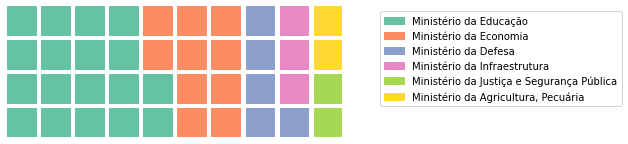

In [ ]:
from pywaffle import Waffle

# 
fig = plt.figure(
                FigureClass=Waffle,
                rows=4,
                columns=10,
                values={'Ministério da Educação': 47152,
                        'Ministério da Economia': 25994,
                        'Ministério da Defesa':  12402,
                        'Ministério da Infraestrutura':6571,
                        'Ministério da Justiça e Segurança Pública':5947,
                        'Ministério da Agricultura, Pecuária': 5858
                        },
                legend={'loc': 'upper left',
                        'bbox_to_anchor': (1.1, 1)}
                )

fig.set_tight_layout(False)
plt.show()

In [ ]:
receita ['NOME ÓRGÃO'].value_counts()

Ministério da Economia - Unidades com vínculo direto                              20884
Fundo do Exército                                                                  3515
Comando da Marinha - Fundo Naval                                                   3417
Fundo do Regime Geral da Previdência Social                                        2209
Fundo Nacional de Cultura                                                          1953
                                                                                  ...  
Instituto Nacional de Tecnologia da Informação                                        4
Centro Nacional de Tecnologia Eletrônica Avançada S.A.                                3
Ministério do Meio Ambiente - Unidades com vínculo direto                             2
Ministério da Mulher, Família e Direitos Humanos - Unidades com vínculo direto        1
Reserva de Contingência                                                               1
Name: NOME ÓRGÃO, Length: 249, d

**Quais setores dentro dos órgãos que tem mais receita**

In [ ]:
receita ['NOME UNIDADE GESTORA'].value_counts()

SETORIAL ORCAMENTARIA E FINANCEIRA / ME         19694
FUNDO DO EXERCITO                                3515
DIRETORIA DE FINANCAS-SISTEMA PARA O PAIS/MM     3448
COORDENACAO DE ORCAMENTO E FINANCAS DO FRGPS     2209
FUNDO NACIONAL DA CULTURA - FNC                  1953
                                                ...  
FUNDACAO NACIONAL DE SAUDE - MT                     1
FUNDACAO NACIONAL DE SAUDE - PA                     1
RESERVA DE CONTINGENCIA/MEFP                        1
INST.FED. FLUMINENSE/CAMPUS CAMPOS-CENTRO           1
FUNDACAO NACIONAL DE SAUDE - PB                     1
Name: NOME UNIDADE GESTORA, Length: 261, dtype: int64

**Quais são as categorias econômicas que mais tem receita?**


- A Classificação por categoria econômica visa classificar as receitas e despesas em operações correntes ou de capital, objetivando propiciar elementos para uma avaliação do efeito econômico das transações do setor público.

In [ ]:
receita ['CATEGORIA ECONÔMICA'].value_counts()

Receitas Correntes                           134576
Receitas de Capital                            3384
Receitas Correntes - intra-orçamentárias       2029
Sem informação                                   15
Receitas de Capital - intra-orçamentárias        13
Name: CATEGORIA ECONÔMICA, dtype: int64

**Quais as principais fontes de receita?**

In [ ]:
receita ['ORIGEM RECEITA'].value_counts()

Receita de Serviços                            43912
Outras Receitas Correntes                      40389
Receita Patrimonial                            22785
Impostos, Taxas e Contribuições de Melhoria    13584
Contribuições                                  11166
Receita Industrial                              2118
Receita Agropecuária                            1964
Amortizações de Empréstimos                     1618
Alienação de Bens                               1088
Transferências Correntes                         575
Operações de Crédito                             499
Outras Receitas de Capital                       148
Receitas Correntes - a classificar               112
Transferências de Capital                         44
Sem informação                                    15
Name: ORIGEM RECEITA, dtype: int64

- Receita de Serviços: é o ingresso proveniente da prestação de serviços de atividades comerciais, financeiras, de transporte, de saúde, de comunicação, de armazenagem, e serviços científicos e tecnológicos de metrologia e outros serviços. 
- Receita Patrimonial: é o ingresso proveniente da fruição do patrimônio, seja decorrente de bens imobiliários ou mobiliários, ou seja, de participação societária. 

**Gráfico para exemplificar as principais fontes de receita:**


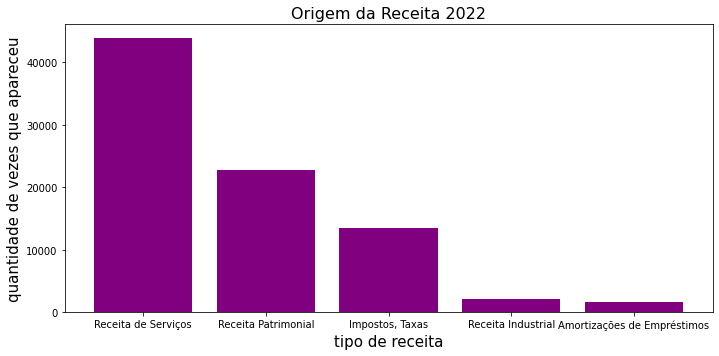

In [ ]:
figura = plt.figure()
ax = figura.add_axes([0,0,1.5,1])
ORIGEM_RECEITA = ["Receita de Serviços", "Receita Patrimonial", "Impostos, Taxas", "Receita Industrial",
                  "Amortizações de Empréstimos"]
pontos = [43878, 22740, 13506, 2115, 1612]
ax.bar(ORIGEM_RECEITA, pontos, color = "purple")
ax.set_title("Origem da Receita 2022", fontsize=16)
ax.set_xlabel("tipo de receita", fontsize=15)
ax.set_ylabel("quantidade de vezes que apareceu", fontsize=15)
plt.show()


                          

A Receita Pública pode ser classificada de acordo com os seguintes aspectos: Quanto à natureza: orçamentária ou extra-orçamentária. Quanto à categoria econômica: correntes e de capital. Quanto ao poder de tributar: federal, estadual ou municipal.

O tributo é outro ponto importante que você precisa levar em consideração. Ela é a receita derivada instituída pelas entidades de direito público, que compreende

Impostos;
Taxas;
Contribuições de Melhoria;
Empréstimos Compulsórios; e
Contribuições Especiais.

**Receita no ano de 2021:**

In [ ]:
receita_2021 = pd.read_csv ('/content/2021_Receitas.csv', sep=';')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
receita_2021.head()

,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,NOME ÓRGÃO,CÓDIGO UNIDADE GESTORA,NOME UNIDADE GESTORA,CATEGORIA ECONÔMICA,ORIGEM RECEITA,ESPÉCIE RECEITA,DETALHAMENTO,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,PERCENTUAL REALIZADO,DATA LANÇAMENTO,ANO EXERCÍCIO
0,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas de Capital,Operações de Crédito,Operações de crédito - mercado interno,TITULOS DE RESPONS.TES.NAC.-MERC.INT.-PRINC.,2224034904,0,0,0,23/04/2021,2021
1,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Receitas Correntes - a classificar,Receitas Correntes - a classificar,Receitas Correntes - a classificar,0,0,0,0,16/04/2021,2021
2,25201,Banco Central do Brasil - Orçamento Fiscal e,25201,Banco Central do Brasil - Orçamento Fiscal e S...,173057,BANCO CENTRAL DO BRASIL,Receitas Correntes,Receita de Serviços,Serviços Administrativos e Comerciais Gerais,SERVICOS DE INFORMACAO E TECNOLOGIA-PRINCIPAL,0,0,"7250,2",0,10/08/2021,2021
3,25201,Banco Central do Brasil - Orçamento Fiscal e,25201,Banco Central do Brasil - Orçamento Fiscal e S...,173057,BANCO CENTRAL DO BRASIL,Receitas Correntes,Receita de Serviços,Serviços Administrativos e Comerciais Gerais,SERVICOS DE INFORMACAO E TECNOLOGIA-PRINCIPAL,0,0,"10679,27",0,18/03/2021,2021
4,25201,Banco Central do Brasil - Orçamento Fiscal e,25201,Banco Central do Brasil - Orçamento Fiscal e S...,173057,BANCO CENTRAL DO BRASIL,Receitas Correntes,Receita de Serviços,Serviços Administrativos e Comerciais Gerais,SERVICOS DE INFORMACAO E TECNOLOGIA-PRINCIPAL,0,0,"209703,66",0,29/10/2021,2021


In [ ]:
receita_2021.nunique()

CÓDIGO ÓRGÃO SUPERIOR            22
NOME ÓRGÃO SUPERIOR              22
CÓDIGO ÓRGÃO                    257
NOME ÓRGÃO                      256
CÓDIGO UNIDADE GESTORA          271
NOME UNIDADE GESTORA            268
CATEGORIA ECONÔMICA               5
ORIGEM RECEITA                   15
ESPÉCIE RECEITA                  42
DETALHAMENTO                    605
VALOR PREVISTO ATUALIZADO      1811
VALOR LANÇADO                  1291
VALOR REALIZADO              107768
PERCENTUAL REALIZADO             17
DATA LANÇAMENTO                 364
ANO EXERCÍCIO                     1
dtype: int64

In [ ]:
receita_2021 ['NOME ÓRGÃO SUPERIOR'].value_counts()

Ministério da Educação                           43700
Ministério da Economia                           29953
Ministério da Defesa                             14764
Ministério da Justiça e Segurança Pública         6492
Ministério da Agricultura, Pecuária e Abastec     6377
Ministério da Infraestrutura                      5776
Ministério do Trabalho                            5280
Ministério da Ciência, Tecnologia, Inovações      5210
Ministério de Minas e Energia                     4984
Ministério das Comunicações                       4521
Ministério da Saúde                               4503
Ministério do Desenvolvimento Regional            4407
Ministério do Meio Ambiente                       4340
Ministério do Turismo                             3511
Banco Central do Brasil - Orçamento Fiscal e      1319
Ministério das Relações Exteriores                 579
Ministério da Cidadania                            571
Presidência da República                           419
Ministério

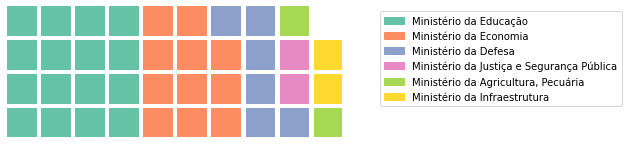

In [ ]:
fig = plt.figure(
                FigureClass=Waffle,
                rows=4,
                columns=10,
                values={'Ministério da Educação': 43700,
                        'Ministério da Economia': 29953,
                        'Ministério da Defesa':  14764,
                        'Ministério da Justiça e Segurança Pública':6492,
                        'Ministério da Agricultura, Pecuária':6377,
                        'Ministério da Infraestrutura':5776},
                legend={'loc': 'upper left',
                        'bbox_to_anchor': (1.1, 1)}
                )

fig.set_tight_layout(False)
plt.show()

In [ ]:
receita_2021 ['ORIGEM RECEITA'].value_counts()

Receita de Serviços                            43782
Outras Receitas Correntes                      43071
Receita Patrimonial                            22951
Impostos, Taxas e Contribuições de Melhoria    14718
Contribuições                                  12685
Receita Industrial                              2051
Receita Agropecuária                            2045
Amortizações de Empréstimos                     1994
Alienação de Bens                               1625
Operações de Crédito                             901
Transferências Correntes                         713
Receitas Correntes - a classificar               187
Outras Receitas de Capital                       167
Transferências de Capital                         38
Sem informação                                    17
Name: ORIGEM RECEITA, dtype: int64

Receita de Serviços: é o ingresso proveniente da prestação de serviços de atividades comerciais, financeiras, de transporte, de saúde, de comunicação, de armazenagem, e serviços científicos e tecnológicos de metrologia e outros serviços.

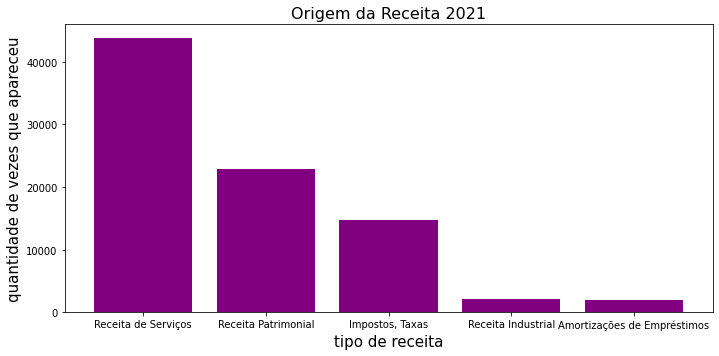

In [ ]:
figura = plt.figure()
ax = figura.add_axes([0,0,1.5,1])
ORIGEM_RECEITA = ["Receita de Serviços", "Receita Patrimonial", "Impostos, Taxas", "Receita Industrial",
                  "Amortizações de Empréstimos"]
pontos = [43782, 22951, 14718, 2051, 1994]
ax.bar(ORIGEM_RECEITA, pontos, color = "purple")
ax.set_title("Origem da Receita 2021", fontsize=16)
ax.set_xlabel("tipo de receita", fontsize=15)
ax.set_ylabel("quantidade de vezes que apareceu", fontsize=15)
plt.show()

Pontos observados:
- os ministérios da educação, economia e defesa foram os que mais trouxeram receita, tanto em 2021 como em 2022 até o momento.
- a principal fonte de receita são os serviços.
- patrimonios e taxas e impostos também possuem expressividade na arrecadação da receita.

# **Despesas**

Aqui irei analisar as despesas públicas referentes apenas ao mês de novembro de 2022. Algumas perguntas que serão respondidas:


*   Qual órgão do governo teve as despesas mais altas neste mês?
*   Quais unidades orçamentárias* tiveram as despesas mais altas? 
* Em quais modalidades ocorreram gastos?



*Unidade orçamentária é o menor nível da classificação institucional. É a destinatária das dotações do orçamento da União. Corresponde a entidades da administração direta ou indireta na maioria dos casos, podendo servir também para identificar fundos especiais, transferências a Estados e Municípios, encargos financeiros da União, operações oficiais de crédito, refinanciamento da dívida pública mobiliária federal e reserva de contingência.



**Conhecendo os dados de despesas do mês 11/2022:**

In [ ]:
despesas = pd.read_csv ('/content/202211_Despesas.csv',sep=';')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#quais são as colunas do dataset
despesas.columns

Index(['Ano e mês do lançamento', 'Código Órgão Superior',
       'Nome Órgão Superior', 'Código Órgão Subordinado',
       'Nome Órgão Subordinado', 'Código Unidade Gestora',
       'Nome Unidade Gestora', 'Código Gestão', 'Nome Gestão',
       'Código Unidade Orçamentária', 'Nome Unidade Orçamentária',
       'Código Função', 'Nome Função', 'Código Subfução', 'Nome Subfunção',
       'Código Programa Orçamentário', 'Nome Programa Orçamentário',
       'Código Ação', 'Nome Ação', 'Código Plano Orçamentário',
       'Plano Orçamentário', 'Código Programa Governo',
       'Nome Programa Governo', 'UF', 'Município', 'Código Subtítulo',
       'Nome Subtítulo', 'Código Localizador', 'Nome Localizador',
       'Sigla Localizador', 'Descrição Complementar Localizador',
       'Código Autor Emenda', 'Nome Autor Emenda',
       'Código Categoria Econômica', 'Nome Categoria Econômica',
       'Código Grupo de Despesa', 'Nome Grupo de Despesa',
       'Código Elemento de Despesa', 'Nome Element

In [ ]:
#como estão registrados os dados nessas colunas
despesas.dtypes

Ano e mês do lançamento                 object
Código Órgão Superior                    int64
Nome Órgão Superior                     object
Código Órgão Subordinado                 int64
Nome Órgão Subordinado                  object
Código Unidade Gestora                   int64
Nome Unidade Gestora                    object
Código Gestão                          float64
Nome Gestão                             object
Código Unidade Orçamentária              int64
Nome Unidade Orçamentária               object
Código Função                            int64
Nome Função                             object
Código Subfução                          int64
Nome Subfunção                          object
Código Programa Orçamentário             int64
Nome Programa Orçamentário              object
Código Ação                             object
Nome Ação                               object
Código Plano Orçamentário               object
Plano Orçamentário                      object
Código Progra

In [ ]:
#somatório dos valores nulos em cada coluna:
despesas.isnull().sum()

Ano e mês do lançamento                    0
Código Órgão Superior                      0
Nome Órgão Superior                        0
Código Órgão Subordinado                   0
Nome Órgão Subordinado                     0
Código Unidade Gestora                     0
Nome Unidade Gestora                       0
Código Gestão                            618
Nome Gestão                              618
Código Unidade Orçamentária                0
Nome Unidade Orçamentária                  0
Código Função                              0
Nome Função                                0
Código Subfução                            0
Nome Subfunção                             0
Código Programa Orçamentário               0
Nome Programa Orçamentário                 0
Código Ação                                0
Nome Ação                                  0
Código Plano Orçamentário                  0
Plano Orçamentário                         0
Código Programa Governo                    0
Nome Progr

In [ ]:
despesas.select_dtypes(include='object')

,Ano e mês do lançamento,Nome Órgão Superior,Nome Órgão Subordinado,Nome Unidade Gestora,Nome Gestão,Nome Unidade Orçamentária,Nome Função,Nome Subfunção,Nome Programa Orçamentário,Código Ação,...,Nome Categoria Econômica,Nome Grupo de Despesa,Nome Elemento de Despesa,Modalidade da Despesa,Valor Empenhado (R$),Valor Liquidado (R$),Valor Pago (R$),Valor Restos a Pagar Inscritos (R$),Valor Restos a Pagar Cancelado (R$),Valor Restos a Pagar Pagos (R$)
0,2022/11,Ministério da Economia,Ministério da Economia - Unidades com vínculo ...,DIVISAO DE PESSOAL EX-TERRITORIO DE RORAIMA,TESOURO NACIONAL,RECURSOS SOB SUPERVISAO DO ME - TRF.ME,Administração,Administração geral,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,218I,...,DESPESAS CORRENTES,Pessoal e Encargos Sociais,Obrigações Patronais,Reserva de Contingência,0,0,"295578,29",0,0,0
1,2022/11,"Ministério da Agricultura, Pecuária e Abastec","Ministério da Agricultura, Pecuária e Abasteci...","SUPERINT.FED.DE AGRIC.,PEC.E ABASTECIMENTO/MT",TESOURO NACIONAL,MINISTERIO DA AGRIC.PECUARIA E ABASTECIMENTO,Agricultura,Normatização e fiscalização,DEFESA AGROPECUARIA,214W,...,DESPESAS CORRENTES,Outras Despesas Correntes,Outros Serviços de Terceiros - Pessoa Jurídic,Reserva de Contingência,"0,83","97,48","311,56",0,0,0
2,2022/11,"Ministério da Agricultura, Pecuária e Abastec","Ministério da Agricultura, Pecuária e Abasteci...","SECRET.DE INOVACAO,DESENV.SUSTENTAVEL E IRRIG",NaN,MINISTERIO DA AGRIC.PECUARIA E ABASTECIMENTO,Agricultura,Promoção da produção agropecuária,AGROPECUARIA SUSTENTAVEL,20ZV,...,DESPESAS DE CAPITAL,Investimentos,Auxílios,Transferências a Estados e ao Distrito Federal,0,0,0,238750,0,0
3,2022/11,Ministério da Educação,Fundação Universidade Federal de São João Del-Rei,FUNDACAO UNIVERSIDADE FEDERAL DE S.J.DEL-REI,FUNDACAO UNIVERSIDADE FEDERAL DE S.J DEL-REI,FUNDACAO UNIVERSIDADE FEDERAL DE S.J.DEL-REI,Educação,Ensino superior,"EDUCACAO SUPERIOR - GRADUACAO, POS-GRADUACAO, ...",4002,...,DESPESAS CORRENTES,Outras Despesas Correntes,Outros Serviços de Terceiros - Pessoa Física,Reserva de Contingência,5360,2240,"5411,2",0,0,0
4,2022/11,Ministério da Educação,Instituto Federal Fluminense,INST. FED. FLUMINENSE/CAMPUS QUISSAMA,"INST.FED.DE EDUC.,CIENC.E TEC.FLUMINENSE",MINISTERIO DA EDUCACAO,Educação,Ensino profissional,EDUCACAO PROFISSIONAL E TECNOLOGICA,15R4,...,DESPESAS DE CAPITAL,Investimentos,Equipamentos e Material Permanente,Reserva de Contingência,131400,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46644,2022/11,Presidência da República,Presidência da República,SECRETARIA ESPECIAL DE ADMINISTRACAO/PR,TESOURO NACIONAL,AUTORIDADE NACIONAL DE PROTECAO DE DADOS-ANPD,Administração,Normatização e fiscalização,BRASIL MODERNIZA,21D5,...,DESPESAS CORRENTES,Outras Despesas Correntes,Outros Serviços de Terceiros - Pessoa Jurídic,Reserva de Contingência,0,"474,59","474,59",0,0,0
46645,2022/11,Ministério da Educação,Instituto Federal do Ceará,CAMPUS ITAPIPOCA/IFCE,"INST.FED.DE EDUC.,CIENC.E TEC.DO CEARA","INST.FED.DE EDUC.,CIENC.E TEC.DO CEARA",Educação,Ensino profissional,EDUCACAO PROFISSIONAL E TECNOLOGICA,20RL,...,DESPESAS CORRENTES,Outras Despesas Correntes,Locação de Mão-de-Obra,Reserva de Contingência,0,"5778,16","36155,86",0,0,0
46646,2022/11,Ministério da Educação,Empresa Brasileira de Serviços Hospitalares,HOSPITAL UNIVERSITARIO DA UFSC,EMPRESA BRASILEIRA DE SERVICOS HOSPITALARES,FUNDO NACIONAL DE SAUDE,Saúde,Assistência hospitalar e ambulatorial,ATENCAO ESPECIALIZADA A SAUDE,8585,...,DESPESAS CORRENTES,Outras Despesas Correntes,Material de Consumo,Reserva de Contingência,"268307,73","406179,38","1577771,15",0,0,3508
46647,2022/11,Ministério da Educação,Fundação Universidade Federal de Uberlândia,FUNDACAO UNIVERSIDADE FEDERAL DE UBERLANDIA,FUNDACAO UNIVERSIDADE FEDERAL DE UBERLANDIA,FUNDACAO UNIVERSIDADE FEDERAL DE UBERLANDIA,Educação,Ensino superior,"EDUCACAO SUPERIOR - GRADUACAO, POS-GRADUACAO, ...",4002,...,DESPESAS CORR

In [ ]:
#quantidade de registros únicos em cada coluna
despesas.nunique()

Ano e mês do lançamento                    1
Código Órgão Superior                     21
Nome Órgão Superior                       21
Código Órgão Subordinado                 235
Nome Órgão Subordinado                   235
Código Unidade Gestora                  3036
Nome Unidade Gestora                    2630
Código Gestão                            185
Nome Gestão                              185
Código Unidade Orçamentária              326
Nome Unidade Orçamentária                322
Código Função                             28
Nome Função                               28
Código Subfução                           95
Nome Subfunção                            95
Código Programa Orçamentário             130
Nome Programa Orçamentário               118
Código Ação                              850
Nome Ação                                835
Código Plano Orçamentário                159
Plano Orçamentário                      1950
Código Programa Governo                   10
Nome Progr

soma do valor pago: R$1.382.570.810,3
despesas 11/2022

em nov/2021: R$1.911.441.100,0


In [ ]:
#Olhando para algumas colunas específicas:
despesas ['Nome Órgão Superior'].value_counts()

Ministério da Defesa                             14262
Ministério da Educação                           14119
Ministério da Agricultura, Pecuária e Abastec     3297
Ministério da Economia                            2614
Ministério da Justiça e Segurança Pública         2308
Ministério da Saúde                               2214
Ministério das Relações Exteriores                1232
Ministério de Minas e Energia                     1195
Ministério do Desenvolvimento Regional            1106
Ministério da Ciência, Tecnologia, Inovações       712
Ministério da Infraestrutura                       698
Ministério do Meio Ambiente                        631
Ministério do Turismo                              550
Ministério do Trabalho                             545
Ministério da Cidadania                            349
Ministério das Comunicações                        288
Presidência da República                           156
Ministério da Mulher, Família e Direitos Huma      120
Advocacia-

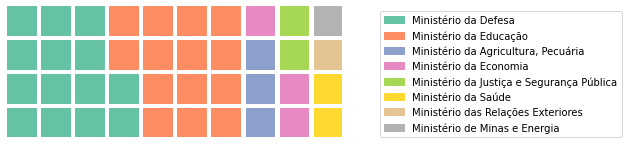

In [ ]:
fig = plt.figure(
                FigureClass=Waffle,
                rows=4,
                columns=10,
                values={'Ministério da Defesa':  14262,
                    'Ministério da Educação': 14119,
                        'Ministério da Agricultura, Pecuária': 3297, 
                        'Ministério da Economia': 2614,
                        'Ministério da Justiça e Segurança Pública': 2308,
                        'Ministério da Saúde': 2214,
                        'Ministério das Relações Exteriores':  1232,
                        'Ministério de Minas e Energia':  1195
                        },
                legend={'loc': 'upper left',
                        'bbox_to_anchor': (1.1, 1)}
                )

fig.set_tight_layout(False)
plt.show()

**quem são os órgãos que possuem as despesas mais altas?**


In [ ]:
despesas ['Nome Unidade Orçamentária'].value_counts()

COMANDO DO EXERCITO                             6134
FUNDO DO EXERCITO                               2660
FUNDO NACIONAL DE SAUDE                         1768
MINISTERIO DA AGRIC.PECUARIA E ABASTECIMENTO    1564
FUNDO NAVAL                                     1498
                                                ... 
BANCO CENTRAL DO BRASIL                            1
FUNDO NACIONAL SOBRE MUDANCAS DO CLIMA             1
CONSELHO NACIONAL DO MINISTERIO PUBLICO-CNMP       1
REC. SOB SUP. MINIST. AGRIC. PEC. ABASTEC.         1
RECURSOS SOB SUPERVISAO DO FCO-MDR                 1
Name: Nome Unidade Orçamentária, Length: 322, dtype: int64

- onde o ministerio da defesa tem gastado 

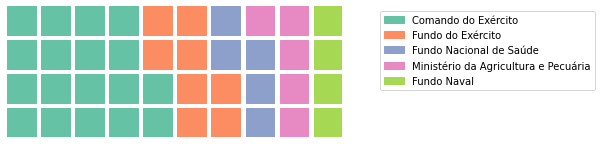

In [ ]:
fig = plt.figure(
                FigureClass=Waffle,
                rows=4,
                columns=10,
                values={'Comando do Exército ': 6134,
                        'Fundo do Exército': 2660,
                        'Fundo Nacional de Saúde ':  1768,
                        'Ministério da Agricultura e Pecuária':1564,
                        'Fundo Naval':1498 },
                legend={'loc': 'upper left',
                        'bbox_to_anchor': (1.1, 1)}
                )

fig.set_tight_layout(False)
plt.show()

In [ ]:
despesas ['Nome Programa Orçamentário'].value_counts()

PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECUTIVO                                 18394
EDUCACAO PROFISSIONAL E TECNOLOGICA                                                 5935
DEFESA NACIONAL                                                                     5492
EDUCACAO SUPERIOR - GRADUACAO, POS-GRADUACAO, ENSINO, PESQUISA E EXTENSAO           3678
SEGURANCA PUBLICA, COMBATE A CORRUPCAO, AO CRIME ORGANIZADO E AO CRIME VIOLENTO      907
                                                                                   ...  
PROMOCAO DO TRABALHO DECENTE E ECONOMIA SOLIDARIA                                      1
ATENCAO BASICA EM SAUDE                                                                1
PROGRAMA DE GESTAO E MANUTENCAO DO MINISTERIO DE MINAS E ENERGIA                       1
ASSISTENCIA AMBULATORIAL E HOSPITALAR ESPECIALIZADA                                    1
SIMPLIFICACAO DA VIDA DA EMPRESA E DO CIDADAO: BEM MAISSIMPLES BRASIL                  1
Name: Nome Programa O

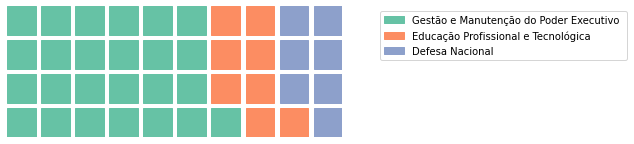

In [ ]:
fig = plt.figure(
                FigureClass=Waffle,
                rows=4,
                columns=10,
                values={'Gestão e Manutenção do Poder Executivo ': 18394,
                        'Educação Profissional e Tecnológica': 5935,
                        'Defesa Nacional':  5492},
                legend={'loc': 'upper left',
                        'bbox_to_anchor': (1.1, 1)}
                )

fig.set_tight_layout(False)
plt.show()

In [ ]:
despesas ['Nome Unidade Gestora'].value_counts()

COMPANHIA DE PESQUISA DE RECURSOS MINERAIS       798
DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE       558
CIA DE DES.DOS VALES DO S.FRANC.E DO PARNAIBA    532
DEPART.NAC.INFRA ESTRUTURA TRANSPORTES.          234
FUNDO NACIONAL DE DESENVOLVIMENTO DA EDUCACAO    199
                                                ... 
ICMBIO KFW                                         1
CENTRO TECNICO AUDIOVISUAL-CTAV                    1
COMISSAO REGIONAL DE OBRAS DA 8ªRM                 1
SECRET.DE COORD.E GOVERNANCA DAS EMP.ESTATAIS      1
HOSPITAL UNIVERSITARIO DA UNIV. FED. DO AMAPA      1
Name: Nome Unidade Gestora, Length: 2630, dtype: int64

In [ ]:
despesas['Nome Categoria Econômica'].value_counts()

DESPESAS CORRENTES     41348
DESPESAS DE CAPITAL     5301
Name: Nome Categoria Econômica, dtype: int64

**quais são as modalidades de despesa onde é gasto o dinheiro público?**

In [ ]:
despesas['Modalidade da Despesa'].value_counts()

Reserva de Contingência                                       43876
APLICACOES DIRETAS - OPER.INTRA-ORCAMENTARIAS                   999
Transferências a Municípios                                     587
TRANSFERENCIAS A MUNICIPIOS - FUNDO A FUNDO                     409
Transferências a Instituições Privadas sem Fins Lucrativos      291
TRANSFER. A ESTADOS E AO DF - FUNDO A FUNDO                     200
Transferências a Estados e ao Distrito Federal                  191
Transferências ao Exterior                                       29
TRANSFERENCIAS A MUNICIPIOS ART.24 LC 141/12                     26
APLICACOES DIRETAS - OP. INTRA-ORCAMENTARIAS                     21
EXECUCAO ORCAMENTARIA DELEGADA AOS ESTADOS/DF                     5
EXECUCAO ORCAMENTARIA DELEGADA A MUNICIPIOS                       5
TRANSFERENCIAS A ESTADOS E DF - FUNDO A FUNDO                     4
TRANSFERENCIAS FUNDO A FUNDO ART.24 LC 141/12                     2
TRANSF.CONSORC.PUB.MEDIANTE CONTRATO RATEIO     

**Quais órgaos se destacam por aparecerem mais vezes nas despesas?**

In [ ]:
despesas['Nome Órgão Subordinado'].value_counts()

Comando do Exército                                                                  7313
Fundo do Exército                                                                    2694
Comando da Marinha                                                                   2556
Ministério da Economia - Unidades com vínculo direto                                 1532
Ministério da Agricultura, Pecuária e Abastecimento - Unidades com vínculo direto    1449
                                                                                     ... 
Fundo Constitucional de Financiamento do Norte                                          1
Fundo de Garantia à Exportação                                                          1
Fundo de Terras e da Reforma Agrária                                                    1
Fundo de Estabilidade do Seguro Rural                                                   1
Fundo Constitucional de Financiamento do Centro-Oeste                                   1
Name: Nome

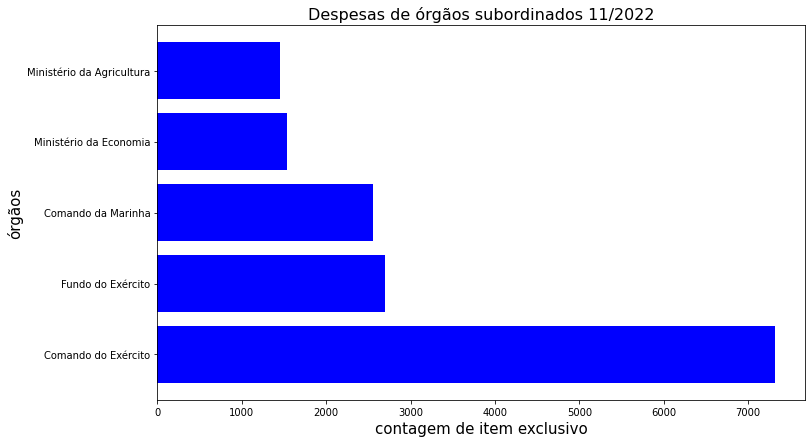

In [ ]:
figura = plt.figure()
ax = figura.add_axes([0,0,1.5,1.3])
series_netflix = ["Comando do Exército", "Fundo do Exército", "Comando da Marinha", "Ministério da Economia",
                  "Ministério da Agricultura"]
pontos = [7313, 2694, 2556, 1532, 1449]
ax.barh(series_netflix, pontos, color = "blue")
ax.set_title("Despesas de órgãos subordinados 11/2022", fontsize=16)
ax.set_xlabel("contagem de item exclusivo", fontsize=15)
ax.set_ylabel("órgãos", fontsize=15)
plt.show()

**Conhecendo os dados de despesas do mês 11/2021:**

Como estava o cenário há um ano atrás?

In [ ]:
despesa_nov11 = pd.read_csv ('/content/Despesas_nov11.csv', sep=';', header= 0)

In [ ]:
despesa_nov11.head()

,Ano e mês do lançamento,Código Órgão Superior,Nome Órgão Superior,Código Órgão Subordinado,Nome Órgão Subordinado,Código Unidade Gestora,Nome Unidade Gestora,Código Gestão,Nome Gestão,Código Unidade Orçamentária,...,Código Elemento de Despesa,Nome Elemento de Despesa,Código Modalidade da Despesa,Modalidade da Despesa,Valor Empenhado (R$),Valor Liquidado (R$),Valor Pago (R$),Valor Restos a Pagar Inscritos (R$),Valor Restos a Pagar Cancelado (R$),Valor Restos a Pagar Pagos (R$)
0,2021/11,30000,Ministério da Justiça e Segurança Pública,30802,Departamento de Polícia Rodoviária Federal,200230,SERVICO DE ORCAMENTO E FINANCAS DE PESSOAL,1.0,TESOURO NACIONAL,30107,...,49,Auxílio-Transporte,90,Reserva de Contingência,0,"259012,22","257864,69",0,0,0
1,2021/11,26000,Ministério da Educação,26404,Instituto Federal Baiano,154580,INSTITUTO FEDERAL BAIANO - CAMPUS ITAPETINGA,26404.0,"INST.FED.DE EDUC.,CIENC.E TEC.BAIANO",26101,...,37,Locação de Mão-de-Obra,90,Reserva de Contingência,0,"32352,45",0,0,0,0
2,2021/11,24000,"Ministério da Ciência, Tecnologia, Inovações",20501,Conselho Nacional de Desenvolvimento Científic...,364102,CONSELHO NAC DE DESENV CIENT E TECNOLOGICO,36201.0,CONSELHO NAC.DE DESENV.CIENTIFICO TECNOLOGICO,52101,...,18,Auxílio Financeiro a Estudantes,90,Reserva de Contingência,835900,131900,122900,0,0,0
3,2021/11,52000,Ministério da Defesa,52121,Comando do Exército,160015,COMANDO 2 GRUPAMENTO ENGENHARIA,1.0,TESOURO NACIONAL,39252,...,30,Material de Consumo,90,Reserva de Contingência,"1103,08","1103,08","1103,08",0,0,0
4,2021/11,39000,Ministério da Infraestrutura,39252,Departamento Nacional de Infraestrutura de Tra...,393027,SUPERINTENDENCIA REG. NO ESTADO BA - DNIT,39252.0,DEPTO. NAC. DE INFRA±ESTRUTURA DE TRANSPORTES,39252,...,39,Outros Serviços de Terceiros - Pessoa Jurídic,91,APLICACOES DIRETAS - OPER.INTRA-ORCAMENTARIAS,"-535,65",0,0,0,0,0


In [ ]:
despesa_nov11.columns

Index(['Ano e mês do lançamento', 'Código Órgão Superior',
       'Nome Órgão Superior', 'Código Órgão Subordinado',
       'Nome Órgão Subordinado', 'Código Unidade Gestora',
       'Nome Unidade Gestora', 'Código Gestão', 'Nome Gestão',
       'Código Unidade Orçamentária', 'Nome Unidade Orçamentária',
       'Código Função', 'Nome Função', 'Código Subfução', 'Nome Subfunção',
       'Código Programa Orçamentário', 'Nome Programa Orçamentário',
       'Código Ação', 'Nome Ação', 'Código Plano Orçamentário',
       'Plano Orçamentário', 'Código Programa Governo',
       'Nome Programa Governo', 'UF', 'Município', 'Código Subtítulo',
       'Nome Subtítulo', 'Código Localizador', 'Nome Localizador',
       'Sigla Localizador', 'Descrição Complementar Localizador',
       'Código Autor Emenda', 'Nome Autor Emenda',
       'Código Categoria Econômica', 'Nome Categoria Econômica',
       'Código Grupo de Despesa', 'Nome Grupo de Despesa',
       'Código Elemento de Despesa', 'Nome Element

In [ ]:
despesa_nov11.nunique()

Ano e mês do lançamento                    1
Código Órgão Superior                     22
Nome Órgão Superior                       22
Código Órgão Subordinado                 240
Nome Órgão Subordinado                   239
Código Unidade Gestora                  3322
Nome Unidade Gestora                    2897
Código Gestão                            187
Nome Gestão                              187
Código Unidade Orçamentária              352
Nome Unidade Orçamentária                343
Código Função                             28
Nome Função                               28
Código Subfução                           97
Nome Subfunção                            97
Código Programa Orçamentário             175
Nome Programa Orçamentário               157
Código Ação                             1020
Nome Ação                               1019
Código Plano Orçamentário                218
Plano Orçamentário                      2802
Código Programa Governo                    9
Nome Progr

In [ ]:
#Olhando para algumas colunas específicas:
despesa_nov11 ['Nome Órgão Superior'].value_counts()

Ministério da Defesa                             21933
Ministério da Educação                           17811
Ministério da Agricultura, Pecuária e Abastec     4340
Ministério da Saúde                               4027
Ministério da Economia                            3781
Ministério da Justiça e Segurança Pública         3139
Ministério das Relações Exteriores                2958
Ministério do Desenvolvimento Regional            1817
Ministério de Minas e Energia                     1774
Ministério do Trabalho                            1528
Ministério da Infraestrutura                      1052
Ministério do Turismo                             1033
Ministério da Ciência, Tecnologia, Inovações       981
Ministério do Meio Ambiente                        829
Ministério da Cidadania                            773
Sem informação                                     676
Ministério das Comunicações                        378
Ministério da Mulher, Família e Direitos Huma      235
Presidênci

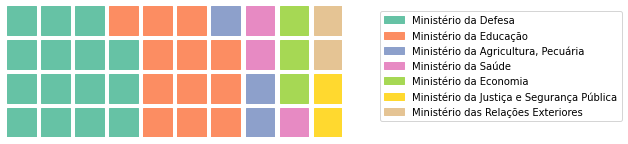

In [ ]:
fig = plt.figure(
                FigureClass=Waffle,
                rows=4,
                columns=10,
                values={'Ministério da Defesa':  21933,
                    'Ministério da Educação': 17811,
                        'Ministério da Agricultura, Pecuária': 4340,
                        'Ministério da Saúde ': 4027,
                        'Ministério da Economia': 3781,
                        'Ministério da Justiça e Segurança Pública': 3139,
                        'Ministério das Relações Exteriores': 2958
                        },
                legend={'loc': 'upper left',
                        'bbox_to_anchor': (1.1, 1)}
                )

fig.set_tight_layout(False)
plt.show()

In [ ]:
despesa_nov11 ['Nome Unidade Orçamentária'].value_counts()

COMANDO DO EXERCITO                              8654
FUNDO DO EXERCITO                                4181
FUNDO NACIONAL DE SAUDE                          3659
MINISTERIO DAS RELACOES EXTERIORES               2968
FUNDO NAVAL                                      2295
                                                 ... 
REC.SOB SUP./FUNDO DA MAR.MERCANTE/FMM-MINFRA       1
RECURSOS SOB SUPERVISAO DA ANS                      1
TRIBUNAL REGIONAL ELEITORAL DE MATO G. DO SUL       1
REC.SOB SUP.CAIXA DE FIN.IMOB.DA AERONAUTICA        1
FUNDO DE ESTAB.DO SEG.RURAL-FESR-R.S/SUP.ME         1
Name: Nome Unidade Orçamentária, Length: 343, dtype: int64

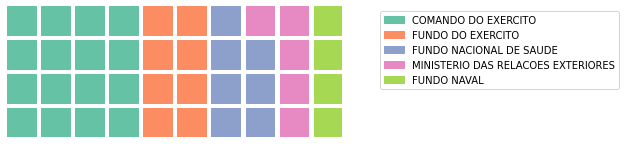

In [ ]:
fig = plt.figure(
                FigureClass=Waffle,
                rows=4,
                columns=10,
                values={'COMANDO DO EXERCITO  ':  8654,
                    'FUNDO DO EXERCITO ': 4181,
                        'FUNDO NACIONAL DE SAUDE': 3659,
                        'MINISTERIO DAS RELACOES EXTERIORES': 2968,
                        'FUNDO NAVAL ': 2295
                                               },
                legend={'loc': 'upper left',
                        'bbox_to_anchor': (1.1, 1)}
                )

fig.set_tight_layout(False)
plt.show()

- As despesas se mantém entre os ministérios em relação à novembro do ano passado.
- Há um padrão entre as despesas públicas, estando os gastos distribuidos entre o ministério da defesa (comando exército e fundo do exército) porém apesar de o ministério da saúde aparecer com menor expressão entre os órgãos superiores, o fundo nacional de saúde tem destaque quando se olha para a unidade orçamentária.
- O Fundo Nacional de Saúde é o gestor financeiro dos recursos destinados a financiar as despesas correntes e de capital do Ministério da Saúde bem como dos órgãos e entidades da administração direta e indireta, integrantes do Sistema Único de Saúde (SUS).

In [ ]:
despesa_nov11['Modalidade da Despesa'].value_counts()

Reserva de Contingência                                       63345
APLICACOES DIRETAS - OPER.INTRA-ORCAMENTARIAS                  2244
TRANSFERENCIAS A MUNICIPIOS - FUNDO A FUNDO                    1136
Transferências a Municípios                                    1060
Transferências a Instituições Privadas sem Fins Lucrativos      839
TRANSFER. A ESTADOS E AO DF - FUNDO A FUNDO                     329
Transferências a Estados e ao Distrito Federal                  316
Transferências ao Exterior                                      196
APLICACOES DIRETAS - OP. INTRA-ORCAMENTARIAS                     36
EXECUCAO ORCAMENTARIA DELEGADA A MUNICIPIOS                      32
TRANSFERENCIAS A ESTADOS E DF - FUNDO A FUNDO                    24
TRANSF.CONSORC.PUB.MEDIANTE CONTRATO RATEIO                      10
EXECUCAO ORCAMENTARIA DELEGADA AOS ESTADOS/DF                    10
Transferências a Instituições Multigovernamentais                 6
Transferências a Instituições Privadas com Fins 

In [ ]:
despesa_nov11 ['Nome Programa Orçamentário'].value_counts()

PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECUTIVO                           25030
DEFESA NACIONAL                                                               9490
EDUCACAO PROFISSIONAL E TECNOLOGICA                                           7001
EDUCACAO SUPERIOR - GRADUACAO, POS-GRADUACAO, ENSINO, PESQUISA E EXTENSAO     4490
POLITICA EXTERNA                                                              2256
                                                                             ...  
PROMOCAO DA PESQUISA E DO DESENVOLVIMENTO CIENTIFICO E TECNOLOGICO               1
CULTURA VIVA - ARTE, EDUCACAO E CIDADANIA                                        1
DESENVOLVIMENTO DA EDUCACAO PROFISSIONAL E TECNOLOGICA                           1
PREVIDENCIA SOCIAL                                                               1
RESIDUOS SOLIDOS URBANOS                                                         1
Name: Nome Programa Orçamentário, Length: 157, dtype: int64

In [ ]:
despesa_nov11['Nome Órgão Subordinado'].value_counts()

Comando do Exército                                                 11026
Comando da Marinha                                                   4232
Fundo do Exército                                                    3858
Ministério das Relações Exteriores - Unidades com vínculo direto     2931
Ministério da Saúde - Unidades com vínculo direto                    2767
                                                                    ...  
Fundo Constitucional de Financiamento do Centro-Oeste                   1
Secretaria Nacional do Consumidor Fundo                                 1
Fundo Geral de Turismo                                                  1
Fundo Nacional do Meio Ambiente                                         1
Fundo de Estabilidade do Seguro Rural                                   1
Name: Nome Órgão Subordinado, Length: 239, dtype: int64

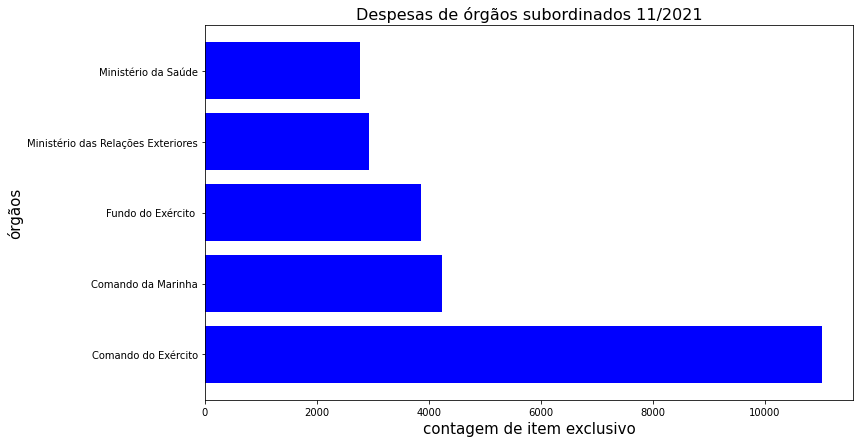

In [ ]:
figura = plt.figure()
ax = figura.add_axes([0,0,1.5,1.3])
series_netflix = ["Comando do Exército", "Comando da Marinha", "Fundo do Exército ", "Ministério das Relações Exteriores",
                  "Ministério da Saúde"]
pontos = [11026, 4232, 3858, 2931, 2767]
ax.barh(series_netflix, pontos, color = "blue")
ax.set_title("Despesas de órgãos subordinados 11/2021", fontsize=16)
ax.set_xlabel("contagem de item exclusivo", fontsize=15)
ax.set_ylabel("órgãos", fontsize=15)
plt.show()

In [ ]:
<iframe src="https://portaldatransparencia.gov.br/graficos/embed/visualizacaoGraficaTabela/barras/barras-verticais?titulo=Receita%20realizada%20(valor%20arrecadado)%20de%20receitas%20por%20%C3%93rg%C3%A3o%20superior&funcionalidade=%2Freceitas%2Fconsulta&colunaOrdenacao=valorRealizado&colunasSelecionadas=orgaoSuperior%2CvalorRealizado&de=2022&ate=2022&orgaos=OS26000" width="100%" height="100%" frameborder="0" style="border:0" allowfullscreen></iframe>

SyntaxError: ignored

**Dados para agregar à análise:**

Dados da Execução da Despesa por Órgão - Ministério da Defesa de janeiro a novembro de 2022


- Onde estão as despesas do ministério da defesa? 
- Quais entidades ou órgãos públicos aparecem nas despesas públicas?

In [ ]:
despesa_defesa = pd.read_csv ('/content/despesasPorOrgao .csv', sep=';', header= 0)

In [ ]:
despesa_defesa.head()

,Mês Ano,Órgão Superior,Órgão/Entidade Vinculada,Valor Empenhado,Valor Liquidado,Valor Pago,Valor Restos a Pagar Pagos
0,abr/22,52000 - Ministério da Defesa,52233 - Amazônia Azul Tecnologia de Defesa S.A.,"1.065.760,15","27.436.447,92","44.299.195,78","1.006.176,05"
1,fev/22,52000 - Ministério da Defesa,52233 - Amazônia Azul Tecnologia de Defesa S.A.,"248.866,63","24.316.618,53","22.947.476,47","6.141.535,40"
2,mar/22,52000 - Ministério da Defesa,52233 - Amazônia Azul Tecnologia de Defesa S.A.,"12.015.574,89","41.950.875,33","24.861.248,38","6.604.103,54"
3,jul/22,52000 - Ministério da Defesa,52233 - Amazônia Azul Tecnologia de Defesa S.A.,"299.052,78","34.834.666,27","37.106.206,86","121.077,06"
4,jun/22,52000 - Ministério da Defesa,52233 - Amazônia Azul Tecnologia de Defesa S.A.,"68.497.200,20","35.837.130,03","82.200.977,49","9.533.840,16"


- Valor pago ao ministerio da defesa: 88.209.936.056,26
- Comando do Exército: 40.432.021.626,93
- Amazônia Azul Tecnologia de Defesa S.A. R$358.220.713,80

In [ ]:
despesa_defesa.columns

Index(['Mês Ano', 'Órgão Superior', 'Órgão/Entidade Vinculada',
       'Valor Empenhado', 'Valor Liquidado', 'Valor Pago',
       'Valor Restos a Pagar Pagos'],
      dtype='object')

In [ ]:
despesa_defesa.columns = despesa_defesa.columns.str.replace(' ', '')

In [ ]:
#quantidade de registros únicos em cada coluna
despesa_defesa.nunique()

Mês Ano                        11
Órgão Superior                  1
Órgão/Entidade Vinculada       10
Valor Empenhado               110
Valor Liquidado               110
Valor Pago                    110
Valor Restos a Pagar Pagos     98
dtype: int64

In [ ]:
despesa_defesa ['ÓrgãoSuperior'].value_counts()

52000 - Ministério da Defesa    110
Name: ÓrgãoSuperior, dtype: int64

In [ ]:
despesa_defesa ['Órgão/EntidadeVinculada'].value_counts()

52233 - Amazônia Azul Tecnologia de Defesa S.A.                              11
31280 - Caixa de Construções de Casas para o Pessoal da Marinha do Brasil    11
52211 - Caixa de Financiamento Imobiliário da Aeronáutica                    11
52111 - Comando da Aeronáutica                                               11
52131 - Comando da Marinha                                                   11
52121 - Comando do Exército                                                  11
52222 - Fundação Osório                                                      11
52904 - Fundo do Exército                                                    11
52221 - Indústria de Material Bélico do Brasil                               11
52000 - Ministério da Defesa - Unidades com vínculo direto                   11
Name: Órgão/EntidadeVinculada, dtype: int64

- Amazônia Azul Tecnologias de Defesa S.A. ou simplesmente Amazul é a uma empresa pública criada pelo governo brasileiro com a atribuição de desenvolver tecnologias ao Programa Nuclear Brasileiro e ao setor nuclear da marinha nacional.